In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold, learning_curve
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
def normalize_column(dataframe, column_name):
    if column_name not in dataframe.columns:
        print(f"A coluna '{column_name}' não existe no DataFrame.")
        return dataframe

    scaler = StandardScaler()

    column_data = dataframe[[column_name]].values
    standardized_data = scaler.fit_transform(column_data)

    standardized_column_name = f"{column_name}"

    dataframe[standardized_column_name] = standardized_data

    return dataframe

In [5]:
def accuracy_function(algoritmo, X_train, y_train, test, vc, columns):
  # Treine o modelo
  model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
  # Avalie o modelo
  loss, accuracy = model.evaluate(X_test, y_test)

In [6]:
def accuracy_function(algoritmo, X_train, y_train, test, vc, columns):
    modelo = algoritmo.fit(X_train, y_train)
    acuracia_modelo = round(modelo.score(X_train, y_train) * 100, 2)

    p = modelo.predict(test[columns])
    sub = pd.Series(p, index=test['PassengerId'], name='Transported')
    sub = sub.replace({0: False, 1: True})
    #sub = None
    train_pred = model_selection.cross_val_predict(algoritmo, X_train, y_train, cv = vc, n_jobs = -1)
    acuracia_vc = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)

    f1_train = round(f1_score(y_train, train_pred) * 100, 2)

    return acuracia_modelo, acuracia_vc, sub, f1_train

In [7]:
def treat_dataframe(df):
  df['VIP'] = df['VIP'].fillna(False)
  df['CryoSleep'] = df['CryoSleep'].fillna(False)
  df.loc[df['Age'].isnull(), 'Age'] = df['Age'].mean()
  df.loc[df['RoomService'].isnull(), 'RoomService'] = df['RoomService'].mean()
  df.loc[df['FoodCourt'].isnull(), 'FoodCourt'] = df['FoodCourt'].mean()
  df.loc[df['ShoppingMall'].isnull(), 'ShoppingMall'] = df['ShoppingMall'].mean()
  df.loc[df['Spa'].isnull(), 'Spa'] = df['Spa'].mean()
  df.loc[df['VRDeck'].isnull(), 'VRDeck'] = df['VRDeck'].mean()
  df['CryoSleep'] = df['CryoSleep'].astype(int)
  df['VIP'] = df['VIP'].astype(int)
  df['Destination_1'] = (df['Destination'] == 'TRAPPIST-1e').astype(int)
  df['Destination_2'] = (df['Destination'] == '55 Cancri e').astype(int)
  df['Destination_3'] = (df['Destination'] == 'PSO J318.5-22').astype(int)
  df['Cabin_number'] = 0
  df['Cabin'] = df['Cabin'].fillna(0)
  df['Cabin_P'] = (df['Cabin'].str[-1] == 'P').astype(int)
  df['Cabin_S'] = (df['Cabin'].str[-1] == 'S').astype(int)
  df['Cabin_number'] = (df['Cabin'].str[2])
  df['Cabin_number'].fillna(df['Cabin_number'].mode()[0], inplace=True)
  df['HomePlanet_1'] = (df['Destination'] == 'Earth').astype(int)
  df['HomePlanet_2'] = (df['Destination'] == 'Europa').astype(int)
  df['HomePlanet_3'] = (df['Destination'] == 'Mars').astype(int)
  df['pass_number'] = (df['PassengerId'].str[-1]).astype(int)

  return df

In [9]:
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

In [11]:
treat_dataframe(train)
train['Transported'] = train['Transported'].astype(int)
treat_dataframe(test)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Destination_1,Destination_2,Destination_3,Cabin_number,Cabin_P,Cabin_S,HomePlanet_1,HomePlanet_2,HomePlanet_3,pass_number
0,0013_01,Earth,1,G/3/S,TRAPPIST-1e,27.000000,0,0.0,0.0,0.0,...,1,0,0,3,0,1,0,0,0,1
1,0018_01,Earth,0,F/4/S,TRAPPIST-1e,19.000000,0,0.0,9.0,0.0,...,1,0,0,4,0,1,0,0,0,1
2,0019_01,Europa,1,C/0/S,55 Cancri e,31.000000,0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,1
3,0021_01,Europa,0,C/1/S,TRAPPIST-1e,38.000000,0,0.0,6652.0,0.0,...,1,0,0,1,0,1,0,0,0,1
4,0023_01,Earth,0,F/5/S,TRAPPIST-1e,20.000000,0,10.0,0.0,635.0,...,1,0,0,5,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,1,G/1496/S,TRAPPIST-1e,34.000000,0,0.0,0.0,0.0,...,1,0,0,1,0,1,0,0,0,2
4273,9269_01,Earth,0,0,TRAPPIST-1e,42.000000,0,0.0,847.0,17.0,...,1,0,0,1,0,0,0,0,0,1
4274,9271_01,Mars,1,D/296/P,55 Cancri e,28.658146,0,0.0,0.0,0.0,...,0,1,0,2,1,0,0,0,0,1
4275,9273_01,Europa,0,D/297/P,NaN,28.658146,0,0.0,2680.0,0.0,...,0,0,0,2,1,0,0,0,0,1


In [12]:
float_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_number']

In [13]:
for column in float_columns:
  train = normalize_column(train, column)

In [14]:
for column in float_columns:
  test = normalize_column(test, column)

In [15]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Destination_1,Destination_2,Destination_3,Cabin_number,Cabin_P,Cabin_S,HomePlanet_1,HomePlanet_2,HomePlanet_3,pass_number
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,0.709437,0,-0.340590,-0.287314,-0.290817,...,1,0,0,-1.224064,1,0,0,0,0,1
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,-0.336717,0,-0.175364,-0.281669,-0.248968,...,1,0,0,-1.224064,0,1,0,0,0,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,2.034566,1,-0.275409,1.955616,-0.290817,...,1,0,0,-1.224064,0,1,0,0,0,1
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,0.290975,0,-0.340590,0.517406,0.330225,...,1,0,0,-1.224064,0,1,0,0,0,2
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,-0.894666,0,0.118709,-0.243409,-0.038048,...,1,0,0,-0.844997,0,1,0,0,0,1


In [16]:
train.isnull().sum()

PassengerId        0
HomePlanet       201
CryoSleep          0
Cabin              0
Destination      182
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             200
Transported        0
Destination_1      0
Destination_2      0
Destination_3      0
Cabin_number       0
Cabin_P            0
Cabin_S            0
HomePlanet_1       0
HomePlanet_2       0
HomePlanet_3       0
pass_number        0
dtype: int64

In [17]:
train['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [18]:
train.groupby(train['CryoSleep'])['Transported'].value_counts(normalize=True).unstack() #.fillna(0)

Transported,0,1
CryoSleep,,
0,0.664958,0.335042
1,0.182417,0.817583


In [19]:
train.groupby(train['Cabin'].str[0])['Transported'].value_counts(normalize=True).unstack() #.fillna(0)

Transported,0,1
Cabin,,
A,0.503906,0.496094
B,0.265725,0.734275
C,0.319946,0.680054
D,0.566946,0.433054
E,0.642694,0.357306
F,0.560129,0.439871
G,0.483783,0.516217
T,0.800000,0.200000


In [20]:
train['Cabin'].str[0].value_counts()

Cabin
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

In [21]:
train['VRDeck'].value_counts()

VRDeck
-2.690226e-01    5495
-1.003243e-16     188
-2.681402e-01     139
-2.672577e-01      70
-2.663752e-01      56
                 ... 
 3.363460e-01       1
 4.793048e-01       1
 1.471192e+00       1
 1.464132e+00       1
 3.644694e+00       1
Name: count, Length: 1307, dtype: int64

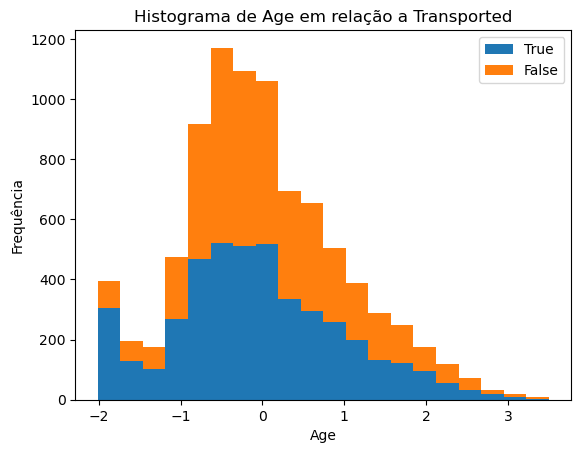

In [22]:
true_data = train[train['Transported'] == True]
false_data = train[train['Transported'] == False]

# Criar o histograma
plt.hist([true_data['Age'], false_data['Age']], bins=20, stacked=True, label=['True', 'False'])
plt.xlabel('Age')
plt.ylabel('Frequência')
plt.legend()
plt.title('Histograma de Age em relação a Transported')
plt.show()

In [23]:
filtro_nome_nan = train['Name'].isna()

# Avaliar a porcentagem de valores "True" e "False em "Transported" nessas linhas
porcentagem_true = (train[filtro_nome_nan]['Transported'] == True).mean() * 100
porcentagem_false = (train[filtro_nome_nan]['Transported'] == False).mean() * 100

print(f"Porcentagem de 'True': {porcentagem_true:.2f}%")
print(f"Porcentagem de 'False': {porcentagem_false:.2f}%")

Porcentagem de 'True': 50.50%
Porcentagem de 'False': 49.50%


In [24]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Destination_1', 'Destination_2',
       'Destination_3', 'Cabin_number', 'Cabin_P', 'Cabin_S', 'HomePlanet_1',
       'HomePlanet_2', 'HomePlanet_3', 'pass_number'],
      dtype='object')

In [25]:
columns = ['CryoSleep', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Destination_1', 'Destination_2', 'Destination_3', 'Cabin_number',
       'Cabin_P', 'Cabin_S', 'HomePlanet_1', 'HomePlanet_2', 'HomePlanet_3', 'pass_number']

In [ ]:
columns = ['CryoSleep',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Destination_1', 'Destination_2', 'Destination_3',
       'Cabin_P', 'Cabin_S', 'HomePlanet_1', 'HomePlanet_2', 'HomePlanet_3']

In [26]:
train.groupby(train['VIP'])['Transported'].value_counts(normalize=True).unstack() #.fillna(0)

Transported,0,1
VIP,,
0,0.493525,0.506475
1,0.618090,0.381910


In [27]:
train[columns].head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Destination_1,Destination_2,Destination_3,Cabin_number,Cabin_P,Cabin_S,HomePlanet_1,HomePlanet_2,HomePlanet_3,pass_number
0,0,0.709437,0,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,1,0,0,-1.224064,1,0,0,0,0,1
1,0,-0.336717,0,-0.175364,-0.281669,-0.248968,0.211505,-0.230194,1,0,0,-1.224064,0,1,0,0,0,1
2,0,2.034566,1,-0.275409,1.955616,-0.290817,5.694289,-0.225782,1,0,0,-1.224064,0,1,0,0,0,1
3,0,0.290975,0,-0.340590,0.517406,0.330225,2.683471,-0.098708,1,0,0,-1.224064,0,1,0,0,0,2
4,0,-0.894666,0,0.118709,-0.243409,-0.038048,0.225732,-0.267258,1,0,0,-0.844997,0,1,0,0,0,1


In [28]:
X = train[columns].fillna(-1)
y = train['Transported']
X_test = test[columns].fillna(-1)

In [29]:
X.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Destination_1,Destination_2,Destination_3,Cabin_number,Cabin_P,Cabin_S,HomePlanet_1,HomePlanet_2,HomePlanet_3,pass_number
0,0,0.709437,0,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,1,0,0,-1.224064,1,0,0,0,0,1
1,0,-0.336717,0,-0.175364,-0.281669,-0.248968,0.211505,-0.230194,1,0,0,-1.224064,0,1,0,0,0,1
2,0,2.034566,1,-0.275409,1.955616,-0.290817,5.694289,-0.225782,1,0,0,-1.224064,0,1,0,0,0,1
3,0,0.290975,0,-0.340590,0.517406,0.330225,2.683471,-0.098708,1,0,0,-1.224064,0,1,0,0,0,2
4,0,-0.894666,0,0.118709,-0.243409,-0.038048,0.225732,-0.267258,1,0,0,-0.844997,0,1,0,0,0,1


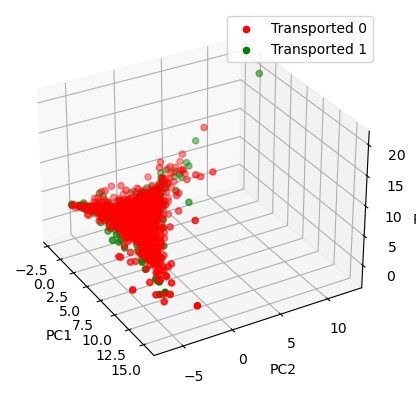

In [30]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])

pca_df['Transported'] = y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

elev = 30  # Elevação
azim = -30#-60  # Azimute

ax.view_init(elev=elev, azim=azim)

for transported, color in [(0, 'r'), (1, 'g')]:
    subset = pca_df[pca_df['Transported'] == transported]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], c=color, label=f'Transported {transported}')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.legend()
plt.show()

In [31]:
X.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Destination_1,Destination_2,Destination_3,Cabin_number,Cabin_P,Cabin_S,HomePlanet_1,HomePlanet_2,HomePlanet_3,pass_number
0,0,0.709437,0,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,1,0,0,-1.224064,1,0,0,0,0,1
1,0,-0.336717,0,-0.175364,-0.281669,-0.248968,0.211505,-0.230194,1,0,0,-1.224064,0,1,0,0,0,1
2,0,2.034566,1,-0.275409,1.955616,-0.290817,5.694289,-0.225782,1,0,0,-1.224064,0,1,0,0,0,1
3,0,0.290975,0,-0.340590,0.517406,0.330225,2.683471,-0.098708,1,0,0,-1.224064,0,1,0,0,0,2
4,0,-0.894666,0,0.118709,-0.243409,-0.038048,0.225732,-0.267258,1,0,0,-0.844997,0,1,0,0,0,1


In [32]:
modelo = LogisticRegression(max_iter=10000)

In [33]:
modelo = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=1)

In [34]:
modelo = SVC(kernel='linear', C=1.0)

In [35]:
modelo = SVC(kernel='linear', C=0.1)

In [ ]:
modelo = SVC(kernel='rbf', C=2.0, gamma=0.1, random_state=1)

In [ ]:
modelo = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=1)

In [ ]:
modelo = DecisionTreeClassifier(random_state=1)

In [ ]:
acc_train_log, acc_vc_log, sub, f1_train = accuracy_function(modelo, X, y, test.fillna(-1), 10, columns)

nome_modelo = "SVC"

print(f"Modelo: {str(modelo)}")
print(f"Acurácia do treino: \t\t\t{acc_train_log} %")
print(f"Acurácia Validação Cruzada: \t\t{acc_vc_log} %")
sub.to_csv("modelo_" + str(modelo) + ".csv", header=True)
print(f"F1 score train: \t\t\t{f1_train} %")

Modelo: GradientBoostingClassifier(n_estimators=50, random_state=1)
Acurácia do treino: 			80.81 %
Acurácia Validação Cruzada: 		79.49 %
F1 score train: 			80.42 %


In [43]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import Precision, Recall, AUC
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import accuracy_score
import pandas as pd
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam
#from keras.utils import to_categorical

# Número de folds para a validação cruzada
n_folds = 7  # Você pode ajustar o número de folds conforme necessário

# Crie o objeto StratifiedKFold
kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

f1_scores = []
accuracies = []

# Variável para manter os pesos do modelo da iteração anterior
previous_weights = None

for train_index, val_index in kf.split(X.values, y):
    X_train_fold, X_val_fold = X.values[train_index], X.values[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Crie e compile o modelo aqui
    model = Sequential()
    model.add(Dense(16, input_dim=X.values.shape[1], activation='relu')) #8
    #model.add(Dense(128, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu')) #4
    model.add(Dense(1, activation='sigmoid'))

    if previous_weights is not None:
      model.set_weights(previous_weights)

    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), AUC()])

    # Treine o modelo com o subconjunto de treinamento atual
    model.fit(X_train_fold, y_train_fold, epochs=210, batch_size=32, verbose=0)

    # Salve os pesos do modelo
    previous_weights = model.get_weights()

    # Avalie o modelo no subconjunto de validação atual
    y_pred = model.predict(X_val_fold)
    y_pred_classes = (y_pred > 0.5).astype(int)  # Converte probabilidades em classes 0 ou 1

    # Calcule o F1-Score para este fold
    f1 = f1_score(y_val_fold, y_pred_classes)
    print(f"F1 desse modelo: {f1}")
    f1_scores.append(f1)
    accuracy = accuracy_score(y_val_fold, y_pred_classes)
    print(f"Acurácia desse modelo: {accuracy}")
    accuracies.append(accuracy)

# Calcule a média dos F1-Scores em todas as dobras
mean_f1_score = np.mean(f1_scores)
print(f'Média do F1-Score: {mean_f1_score}')

39/39 [==============================] - 0s 3ms/step
F1 desse modelo: 0.8003132341425215
Acurácia desse modelo: 0.7946859903381642
39/39 [==============================] - 0s 2ms/step
F1 desse modelo: 0.8119850187265918
Acurácia desse modelo: 0.7979066022544283
39/39 [==============================] - 0s 3ms/step
F1 desse modelo: 0.7915993537964459
Acurácia desse modelo: 0.7922705314009661
39/39 [==============================] - 0s 5ms/step
F1 desse modelo: 0.8142116950407106
Acurácia desse modelo: 0.7979066022544283
39/39 [==============================] - 0s 4ms/step
F1 desse modelo: 0.8049671292914536
Acurácia desse modelo: 0.785024154589372
39/39 [==============================] - 0s 2ms/step
F1 desse modelo: 0.823876197494473
Acurácia desse modelo: 0.8075684380032206
39/39 [==============================] - 0s 3ms/step
F1 desse modelo: 0.8216136195410808
Acurácia desse modelo: 0.8058017727639001
Média do F1-Score: 0.8097951782904682


In [39]:
# Faça a previsão usando o modelo treinado
y_pred = model.predict(test[columns].fillna(-1))

# Converta as probabilidades em classes (0 ou 1) com base em um limite (threshold)
threshold = 0.5  # Você pode ajustar o limite conforme necessário
y_pred_classes = (y_pred > threshold).astype(int)

# Crie uma série pandas com as previsões
#submission = pd.Series(data=y_pred_classes, index=test['PassengerId'], name='Transported')
submission = pd.Series(data=y_pred_classes[:, 0], index=test['PassengerId'], name='Transported')
# Mapeie as classes para os rótulos desejados (por exemplo, 0: False, 1: True)
submission = submission.replace({0: False, 1: True})

134/134 [==============================] - 0s 3ms/step


In [ ]:
submission

PassengerId
0013_01     True
0018_01    False
0019_01     True
0021_01     True
0023_01     True
           ...  
9266_02     True
9269_01     True
9271_01     True
9273_01     True
9277_01     True
Name: Transported, Length: 4277, dtype: bool

In [40]:
# Salve a série em um arquivo CSV
submission.to_csv("submission2.csv", header=True)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import Precision, Recall, AUC
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

# Número de folds para a validação cruzada
n_folds = 7  # Você pode ajustar o número de folds conforme necessário

# Crie o objeto StratifiedKFold
kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

f1_scores = []
accuracies = []

# Variável para manter os pesos do modelo da iteração anterior
previous_weights = None

for train_index, val_index in kf.split(X.values, y):
    X_train_fold, X_val_fold = X.values[train_index], X.values[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Crie e compile o modelo aqui
    model = Sequential()
    model.add(Dense(16, input_dim=X.values.shape[1], activation='relu')) #8
    #model.add(Dense(128, activation='relu'))
    #model.add(Dense(64, activation='relu'))
    model.add(Dense(16, activation='relu')) #4
    model.add(Dense(1, activation='sigmoid'))

    if previous_weights is not None:
        # Carregue os pesos da iteração anterior
        model.set_weights(previous_weights)

    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), AUC()])

    # Treine o modelo com o subconjunto de treinamento atual
    model.fit(X_train_fold, y_train_fold, epochs=210, batch_size=32, verbose=0)

    # Salve os pesos do modelo
    previous_weights = model.get_weights()

    # Avalie o modelo no subconjunto de validação atual
    y_pred = model.predict(X_val_fold)
    y_pred_classes = (y_pred > 0.5).astype(int)  # Converte probabilidades em classes 0 ou 1

    # Calcule o F1-Score para este fold
    f1 = f1_score(y_val_fold, y_pred_classes)
    print(f"F1 desse modelo: {f1}")
    f1_scores.append(f1)
    accuracy = accuracy_score(y_val_fold, y_pred_classes)
    print(f"Acurácia desse modelo: {accuracy}")
    accuracies.append(accuracy)

# Calcule a média dos F1-Scores em todas as dobras
mean_f1_score = np.mean(f1_scores)
print(f'Média do F1-Score: {mean_f1_score}')